### ref 

- https://archive.ics.uci.edu/ml/datasets/housing
- https://inclass.kaggle.com/c/boston-housing/data

In [17]:
# Load basics library 

import pandas as pd, numpy as np
%matplotlib inline
%pylab inline
import seaborn  as sns 
import pylab as pl
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [18]:
# load data 

df_train = pd.read_csv('/Users/yennanliu/Kaggle.com_mini_project/boston_house/train.csv')
df_test = pd.read_csv('/Users/yennanliu/Kaggle.com_mini_project/boston_house/test.csv')

In [19]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
ID         333 non-null int64
crim       333 non-null float64
zn         333 non-null float64
indus      333 non-null float64
chas       333 non-null int64
nox        333 non-null float64
rm         333 non-null float64
age        333 non-null float64
dis        333 non-null float64
rad        333 non-null int64
tax        333 non-null int64
ptratio    333 non-null float64
black      333 non-null float64
lstat      333 non-null float64
medv       333 non-null float64
dtypes: float64(11), int64(4)
memory usage: 39.1 KB


In [20]:
df_train.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [21]:
plt.style.use('ggplot')

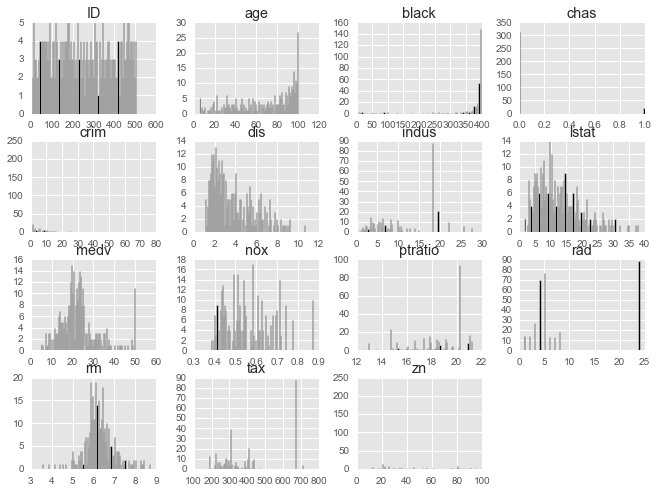

In [22]:
df_train.hist(bins=100, figsize=(11,8),color='black')
plt.show()

In [23]:
# CHECK features correlation

corr = df_train.corr()
corr.loc[:,'medv'].abs().sort_values(ascending=False)[1:]

lstat      0.738600
rm         0.689598
ptratio    0.481376
indus      0.473932
tax        0.448078
nox        0.413054
crim       0.407454
age        0.358888
rad        0.352251
zn         0.344842
black      0.336660
dis        0.249422
ID         0.221694
chas       0.204390
Name: medv, dtype: float64

In [24]:
selected_feature = ['lstat','rm','ptratio']

## 1) SELECT MODELS 

In [25]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score, mean_absolute_error


In [26]:
# help function

def train_test_separate(X,y):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)
    return X_train, X_test, y_train, y_test


### 1-1) Linear regression 

In [53]:
from sklearn import linear_model

# un-normalized data with linear regression 

linear_model = linear_model.LinearRegression()

X =df_train[selected_feature]
y = df_train['medv']
X_train, X_test, y_train, y_test = train_test_separate(X,y)


linear_model.fit(X_train,y_train)
linear_model.score(X_test,y_test)

0.48655692436754305

In [28]:
# normalized data with linear regression 

from sklearn import preprocessing

df_train_scaled = preprocessing.scale(df_train)
df_train_scaled_ = pd.DataFrame(df_train_scaled, columns = df_train.columns)


X_scaled =df_train[selected_feature]
y_scaled = df_train['medv']
X_train_, X_test_, y_train_, y_test_ = train_test_separate(X_scaled,y_scaled)

linear_model.fit(X_train_,y_train_)
linear_model.score(X_test_,y_test_)

0.48655692436754305

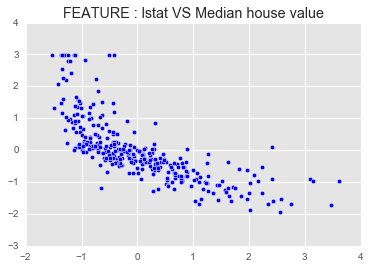

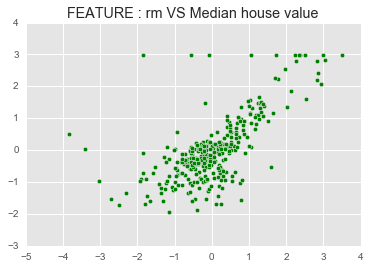

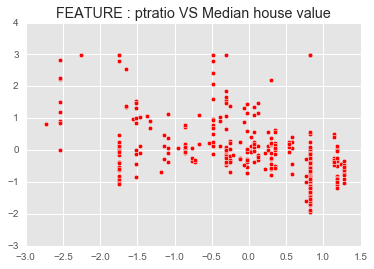

In [29]:
from itertools import cycle
cycol = cycle('bgrcmk')

for feature in selected_feature:
    plt.scatter(df_train_scaled_[feature],df_train_scaled_['medv'], c=next(cycol))
    plt.title('FEATURE : {} VS Median house value'.format(feature) )
    plt.show()
    

### 1-2) Polynomial regression

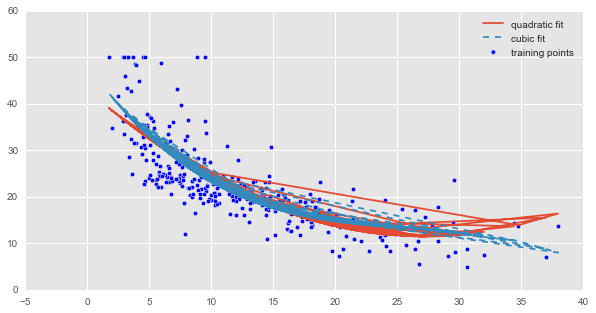

In [115]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


quadratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)

X_ = df_train[['lstat']].values
y_ = df_train[['medv']].values

# transform feature
X_quad = quadratic.fit_transform(X_)
X_cubic = cubic.fit_transform(X_)

# quadratic fit 
pr = LinearRegression()
pr.fit(X_quad,y_)
y_quad_fit = pr.predict(quadratic.fit_transform(X_))

# cubic fit 
pr = LinearRegression()
pr.fit(X_cubic,y_)
y_cubic_fit = pr.predict(cubic.fit_transform(X_))

# visualize 


plt.figure(figsize=(10,5))


plt.scatter(X_,y_, label = 'training points')
plt.plot(X_,y_quad_fit, label = 'quadratic fit',linestyle = '-')
plt.plot(X_,y_cubic_fit, label = 'cubic fit',linestyle = '--')
plt.legend(loc='upper right')
plt.show()



### need to check if data points are ordering 

### 2-1) SVR 

In [30]:
from sklearn.svm import SVR

SVR_model = SVR(kernel='rbf', C=1e3, gamma=0.1)

X =df_train[selected_feature]
y = df_train['medv']
X_train, X_test, y_train, y_test = train_test_separate(X,y)


SVR_model.fit(X_train,y_train)
SVR_model.score(X_test,y_test)

0.528900711362843

In [31]:
## Search best parameter for SVR 

from sklearn import svm
from sklearn.model_selection import GridSearchCV
svc = svm.SVC(C=1, kernel='linear')

Cs = np.logspace(-6, -1, 10)
lf = GridSearchCV(estimator=svc, param_grid=dict(C=Cs),n_jobs=-1)

#clf.fit(X_train,y_train)

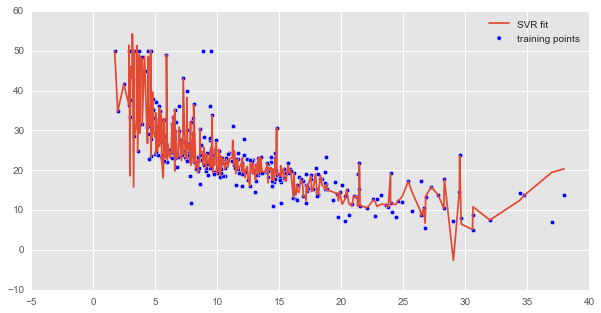

In [136]:
### make data ploints ordering 
sort_idx = X['lstat'].values.flatten().argsort()

plt.figure(figsize=(10,5))

plt.scatter(X['lstat'],y,label = 'training points')

y_SVR_predict =  SVR_model.predict(X)
plt.plot(X['lstat'][sort_idx],y_SVR_predict[sort_idx], label = 'SVR fit',linestyle = '-')

plt.legend(loc='upper right')
plt.show()


###  3-1) Random forest 

In [131]:
from sklearn.ensemble import RandomForestRegressor


RandomForest_model = RandomForestRegressor()

X = df_train[selected_feature]
y = df_train['medv']
X_train, X_test, y_train, y_test = train_test_separate(X,y)


RandomForest_model.fit(X_train,y_train)
RandomForest_model.score(X_test,y_test)

0.72994275256512009

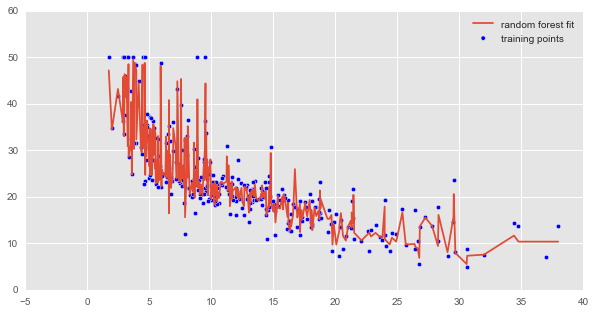

In [134]:
### make data ploints ordering 
sort_idx = X['lstat'].values.flatten().argsort()

plt.figure(figsize=(10,5))

plt.scatter(X['lstat'],y,label = 'training points')

y_tree_predict =  RandomForest_model.predict(X)
plt.plot(X['lstat'][sort_idx],y_tree_predict[sort_idx], label = 'random forest fit',linestyle = '-')

plt.legend(loc='upper right')
plt.show()
